In [45]:
from sklearn import neighbors
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sys
import random

In [250]:
total = pd.read_csv("nyco_scale.csv")
total = total.drop(total.columns[0], axis = 1) #delete index

lagdv = total['lagdv']
tract_id = total['TRACT_GEOID']
mp_date = total['MP_DATE']
dv = total['dv']

total = total.drop(total.columns[1], axis = 1) #delete tract_geoid
total = total.drop(total.columns[169], axis = 1) #delete lagdv
total['subdate'] = [int(date[0:4]) for date in total['MP_DATE']]
total = total.drop(total.columns[0], axis = 1) #delete MP_date
train = total.loc[total['subdate'] < 2016, :]
test = total.loc[total['subdate'] >= 2016, :]
train = train.drop(train.columns[170], axis = 1) #delete subdate
test = test.drop(test.columns[170], axis = 1)
train_y = train['dv'] #get dependent variable
test_y = test['dv']
train_x = train.drop(train.columns[168], axis = 1) #delete dependent variables
test_x = test.drop(test.columns[168], axis = 1)

In [ ]:
train_x.to_csv("train_x.csv")
train_y.to_csv("train_y.csv")
test_x.to_csv("test_x.csv")
test_y.to_csv("test_y.csv")

In [198]:
#dimension reduction
pca = PCA(n_components = 70)
pca.fit(train_x)
train_x_pca = pca.fit_transform(train_x)
var_rat = pca.explained_variance_ratio_
print(sum(var_rat))
pca.fit(test_x)
test_x_pca = pca.fit_transform(test_x)

In [255]:
#fit knn model
best_rss = sys.maxsize
best_k = 5
rss = []
y_predict = []
for i in range(5, 40, 5):
    knn = neighbors.KNeighborsRegressor(i, weights ='distance')
    y_ = knn.fit(train_x_pca, train_y).predict(test_x_pca)
    y_predict.append(y_)
    mid = np.mean((y_ - test_y)**2)
    rss.append(mid)
    if mid < best_rss:
        best_rss = mid
        best_k = i
    print(i)
print("best_k is: %d" % best_k)

0.988982064692


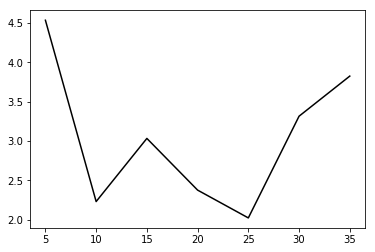

In [259]:
plt.plot(range(5, 40, 5), rss, "k")
plt.show()

In [260]:
knn = neighbors.KNeighborsRegressor(best_k, weights ='distance')
y_ = knn.fit(train_x_pca, train_y).predict(test_x_pca)

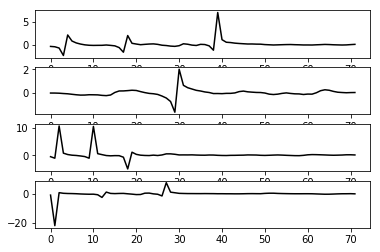

In [268]:
rand_lst = [random.randint(0, 1757) for i in range(0, 4)]
plt.subplot(4, 1, 1)
plt.plot(range(72), train_y[rand_lst[0]*72:(rand_lst[0]+1)*72], 'k')
plt.subplot(4, 1, 2)
plt.plot(range(72), train_y[rand_lst[1]*72:(rand_lst[1]+1)*72], 'k')
plt.subplot(4, 1, 3)
plt.plot(range(72), train_y[rand_lst[2]*72:(rand_lst[2]+1)*72], 'k')
plt.subplot(4, 1, 4)
plt.plot(range(72), train_y[rand_lst[3]*72:(rand_lst[3]+1)*72], 'k')
plt.show()